# Option 1: Sentiment Identification 

## BACKGROUND
A large multinational corporation is seeking to automatically identify the sentiment that their customer base talks about on social media. They would like to expand this capability into multiple languages. Many 3rd party tools exist for sentiment analysis; however, they need help with under-resourced languages. There is special interest in being able to accurately detect negative sentiment. The training data provided includes documents from a wide variety of sources, not merely social media, and some of it may be inconsistently labeled

## Business Case
Determine if there is a feasible method for automatically identifying the customer sentiment based on comments left through social media, which maximizes business information while minimizing costs.

## Analytics Goal 
Train a sentiment classifier (Positive, Negative, Neutral) on a corpus of the social media comments, maximize accuracy maximize accuracy minimizing costs, focusing on accurate detection of negative sentiment. 

## Business Outcomes
Please describe the business outcomes in your work sample including how data limitations impact your results and how these limitations could be addressed in a larger project.

## Load Libraries that are appropraite to our analysis

In [1]:
# Import Utilities
from __future__ import print_function
import logging
from optparse import OptionParser
import sys
from time import time

# Import standard Packages
import numpy as np
import pandas as pd
import eli5
import re

# Import visual functionality
import matplotlib.pyplot as plt

# Import SciKit-Learn Libraies for Utility and Metrics
from sklearn.datasets import fetch_20newsgroups
from sklearn.pipeline import Pipeline
from sklearn.utils.extmath import density
from sklearn import metrics
from sklearn.model_selection import train_test_split

# Import SciKit-Learn Libraies for Natrual Language Processing (NLP)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Import SciKit-Learn Libraies for Feature Selection
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest, chi2

## Import SciKit-Learn Libraies for Classification
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.svm import LinearSVC

C:\Users\jeff\Anaconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
# Activate Progress Bars
from tqdm import *
%%capture 
from tqdm import tqdm_notebook as tqdm
tqdm().pandas()

UsageError: Line magic function `%%capture` not found.


## Preprocessing

Here we define two utility functions one to clean data, and another (optional) uses the phonetic algorithm to hash the data. The function , sub from the re library, return the string obtained by replacing the leftmost non-overlapping occurrences of pattern in string by the replacement repl. For example (see below), re.sub(r'pattern='\,', repl='', string='This, sentence, has, too, many, commas'). If the pattern ',' isn’t found, string (This, sentence, has, too, many, commas) is returned unchanged. repl can be a string or a function. The second replacement looks for the word 'to' and replaces it woth 'too'.

In [3]:
str = 'This, sentence, has, to, many, commas'
new = (re.sub (r',','', str))
spel_error =(re.sub(r'to', 'too', new))
spel_error

'This sentence has too many commas'

In [4]:
# THIS PART WORKS!
import os

from google.oauth2 import service_account
import googleapiclient.discovery

# Get credentials
credentials = service_account.Credentials.from_service_account_file(
    filename=os.environ['GOOGLE_APPLICATION_CREDENTIALS'],
    scopes=['https://www.googleapis.com/auth/cloud-platform'])

# Create the Cloud IAM service object
service = googleapiclient.discovery.build(
    'iam', 'v1', credentials=credentials)

# Call the Cloud IAM Roles API
# If using pylint, disable weak-typing warnings
# pylint: disable=no-member
response = service.roles().list().execute()
roles = response['roles']

# Process the response
for role in roles:
    print('Title: ' + role['title'])
    print('Name: ' + role['name'])
    if 'description' in role:
        print('Description: ' + role['description'])
    print('')

Title: Access Approval Approver
Name: roles/accessapproval.approver
Description: Ability to view or act on access approval requests and view configuration

Title: Access Approval Config Editor
Name: roles/accessapproval.configEditor
Description: Ability update the Access Approval configuration

Title: Access Approval Viewer
Name: roles/accessapproval.viewer
Description: Ability to view access approval requests and configuration

Title: Access Context Manager Admin
Name: roles/accesscontextmanager.policyAdmin
Description: Full access to policies, access levels, and access zones

Title: Access Context Manager Editor
Name: roles/accesscontextmanager.policyEditor
Description: Edit access to policies.  Create, edit, and change access levels and access zones.

Title: Access Context Manager Reader
Name: roles/accesscontextmanager.policyReader
Description: Read access to policies, access levels, and access zones.

Title: Actions Admin
Name: roles/actions.Admin
Description: Access to edit and d

In [5]:
# THIS WORKS!
def sample_translate_text(text, target_language, project_id):
    """
    Translating Text

    Args:
      text The content to translate in string format
      target_language Required. The BCP-47 language code to use for translation.
    """

    client = translate.TranslationServiceClient()

    # TODO(developer): Uncomment and set the following variables
    # text = 'Text you wish to translate'
    # target_language = 'fr'
    # project_id = '[Google Cloud Project ID]'
    contents = [text]
    parent = client.location_path(project_id, "global")

    response = client.translate_text(
        parent=parent,
        contents=contents,
        mime_type='text/plain',  # mime types: text/plain, text/html
        source_language_code='ur',
        target_language_code=target_language)
    # Display the translation for each input text provided
    for translation in response.translations:
        print(u"Translated text: {}".format(translation.translated_text))


In [6]:
#THIS WORKS
from google.cloud import translate

In [7]:
#THIS WORKS
text = 'SINDH police twadi pain da phudaaa gashtiii k bachyyy kabhiii lahorii bndyy sy phadda dal bond par deniii in painchod sindh police ki name khrab ker k rakha Pakistan police in maa e yawoo ki wajah se sub police waloo ko zalil honaa parhtaa h zardari ki bond per firee maro teechod k'
#text = pd.read_csv("D:/Documents/Data/Rome/dataset_aws_2020_test.txt", encoding="ISO-8859-1")
sample_translate_text(text, 'en', 'my-translation-project-266317')

Translated text: SINDH police have been involved in the killing of a police officer in a sub-district of the district police department in Pakistan. maro teechod k


In [8]:
#KEEP WORKING!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

#env:GOOGLE_APPLICATION_CREDENTIALS="C:\Users\jeff\Anaconda\authentication\My Translation Project-de371a644d3d.json"
# Instantiates a client
translate_client = translate.Client()
# The text to translate
text = "In mein mauseeqi ka shauq paida"
# The target language
target = 'en'
# Translate Urdu text into English
translation = translate_client.translate(
    text,
    target_language = target)
print(u'Text: {}'.format(text))
print(u'Translation: {}'.format(translation['TranslatedText']))

AttributeError: module 'google.cloud.translate' has no attribute 'Client'

In [9]:
def cleaner(word):
  word = re.sub(r'\#\.', '', word)
  word = re.sub(r'\n', '', word)
  word = re.sub(r',', '', word)
  word = re.sub(r'\-', ' ', word)
  word = re.sub(r'\.', '', word)
  word = re.sub(r'\\', ' ', word)
  word = re.sub(r'\\x\.+', '', word)
  word = re.sub(r'\d', '', word)
  word = re.sub(r'^_.', '', word)
  word = re.sub(r'_', ' ', word)
  word = re.sub(r'^ ', '', word)
  word = re.sub(r' $', '', word)
  word = re.sub(r'\?', '', word)

  return word.lower()


def hashing(word):
  word = re.sub(r'ain$', r'ein', word)
  word = re.sub(r'ai', r'ae', word)
  word = re.sub(r'ay$', r'e', word)
  word = re.sub(r'ey$', r'e', word)
  word = re.sub(r'ie$', r'y', word)
  word = re.sub(r'^es', r'is', word)
  word = re.sub(r'a+', r'a', word)
  word = re.sub(r'j+', r'j', word)
  word = re.sub(r'd+', r'd', word)
  word = re.sub(r'u', r'o', word)
  word = re.sub(r'o+', r'o', word)
  word = re.sub(r'ee+', r'i', word)
  if not re.match(r'ar', word):
    word = re.sub(r'ar', r'r', word)
  word = re.sub(r'iy+', r'i', word)
  word = re.sub(r'ih+', r'eh', word)
  word = re.sub(r's+', r's', word)
  if re.search(r'[rst]y', 'word') and word[-1] != 'y':
    word = re.sub(r'y', r'i', word)
  if re.search(r'[bcdefghijklmnopqrtuvwxyz]i', word):
    word = re.sub(r'i$', r'y', word)
  if re.search(r'[acefghijlmnoqrstuvwxyz]h', word):
    word = re.sub(r'h', '', word)
  word = re.sub(r'k', r'q', word)
  return word

def array_cleaner(array):
  # X = array
  X = []
  for sentence in array:
    clean_sentence = ''
    words = sentence.split(' ')
    for word in words:
      clean_sentence = clean_sentence +' '+ cleaner(word)
    X.append(clean_sentence)
  return X

In [10]:
import pandas as pd
data = pd.read_csv("D:/Documents/Data/Rome/roman_urdu_dataset_hd.txt", encoding="ISO-8859-1")
data.columns = ['comment','sentiment','nan']
data.head()

,comment,sentiment,nan
0,Aap ko sakht sadma howa aur kai roz tak aap di...,Negative,
1,raja Parshad ko tehrir kiya,Negative,NaN
2,Is tanzeem ka maqsad khawateen ki sahi tor par...,Negative,NaN
3,Kasam say xD Yar ab healthy khana h,Negative,NaN
4,ap k liye Mam D,Negative,NaN


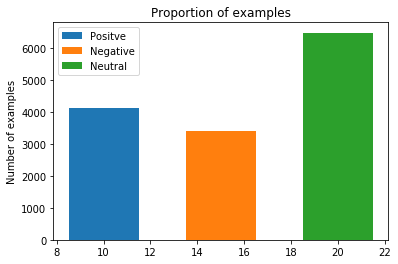

In [11]:
Pos = data[data['sentiment'] == 'Positive'].shape[0]
Neg = data[data['sentiment'] == 'Negative'].shape[0]
Neu = data[data['sentiment'] == 'Neutral'].shape[0]
# bar plot of the 3 classes
plt.bar(10,Pos,3, label="Positve")
plt.bar(15,Neg,3, label="Negative")
plt.bar(20,Neu,3, label="Neutral")
plt.legend()
plt.ylabel('Number of examples')
plt.title('Proportion of examples')
plt.show()

In [12]:
numpy_array = data.as_matrix()
X = numpy_array[:, 0]
# Clean X here
X = array_cleaner(X)
y = numpy_array[:, 1]

C:\Users\jeff\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [13]:
from textblob import TextBlob

In [14]:
>>> testimonial = TextBlob("Textblob is amazingly simple to use. What great fun!")
>>> testimonial.sentiment

Sentiment(polarity=0.39166666666666666, subjectivity=0.4357142857142857)

In [15]:
>>> zen = TextBlob("Beautiful is better than ugly. "
...                "Explicit is better than implicit. "
...                "Simple is better than complex.")
>>> zen.words

WordList(['Beautiful', 'is', 'better', 'than', 'ugly', 'Explicit', 'is', 'better', 'than', 'implicit', 'Simple', 'is', 'better', 'than', 'complex'])

In [16]:
>>> zen.sentences


[Sentence("Beautiful is better than ugly."),
 Sentence("Explicit is better than implicit."),
 Sentence("Simple is better than complex.")]

In [17]:
>>> sentence = TextBlob('Use 4 spaces per indentation level.')
>>> sentence.words
>>> sentence.words[2].singularize()
>>> sentence.words[-1].pluralize()

'levels'

In [18]:
>>> from textblob import Word
>>> w = Word("octopi")
>>> w.lemmatize()
'octopus'
>>> w = Word("went")
>>> w.lemmatize("v")  # Pass in WordNet part of speech (verb)

'go'

In [19]:
>>> en_blob = TextBlob(u'آسان پیچیدہ سے بہتر ہے.')
>>> en_blob.translate(to='en')

TextBlob("Easy is better than complicated.")

In [20]:
en_blob.translate(to='en')

TextBlob("Easy is better than complicated.")

In [48]:
import goslate

text = "Hello Aswani, I have written a 'English' to 'Tamil' translator using Python. I do not know how good it is, but I am testing on you. I wish I could come and see you and India this autumn"

gs = goslate.Goslate()
translatedText = gs.translate(text,'hi')

print(translatedText)

हैलो Aswani, मैं अजगर का उपयोग कर 'तमिल' अनुवादक के लिए एक 'अंग्रेजी' लिखा है। मैं यह कितना अच्छा है पता नहीं है, लेकिन मैं आपको पर परीक्षण कर रहा हूँ। मुझे लगता है मैं आते हैं और आप और भारत इस शरद ऋतु देख सकते हैं इच्छा


In [49]:
import goslate

text = "मैं 'तमिल' अनुवादक के लिए एक 'अंग्रेजी' लिखा है। मैं यह कितना अच्छा है पता नहीं है, लेकिन मैं आपको पर परीक्षण कर रहा हूँ। मुझे लगता है मैं आते हैं और आप और भारत इस शरद ऋतु देख सकते हैं इच्छा"

gs = goslate.Goslate()
translatedText = gs.translate(text,'en')

print(translatedText)

I have written an 'English' to 'Tamil' translator. I do not know how good it is, but I'm testing you. I come to wish you and India can meet this autumn


In [23]:
import requests
url = 'http://translate.google.com/translate_a/t'
params = {
    "text": "Sai kha ya her kisi kay bus ki bat nhi hai lakin main ki hal kal bi Aj aur aj bi sirf Aus say bus.", 
    "sl": "ur", 
    "tl": "en", 
    "client": "p"
}
print(requests.get(url, params=params).content)


b'<!DOCTYPE html PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN">\n<html>\n<head><meta http-equiv="content-type" content="text/html; charset=utf-8"><meta name="viewport" content="initial-scale=1"><title>http://translate.google.com/translate_a/t?text=Sai+kha+ya+her+kisi+kay+bus+ki+bat+nhi+hai+lakin+main+ki+hal+kal+bi+Aj+aur+aj+bi+sirf+Aus+say+bus.&amp;sl=ur&amp;tl=en&amp;client=p</title></head>\n<body style="font-family: arial, sans-serif; background-color: #fff; color: #000; padding:20px; font-size:18px;" onload="e=document.getElementById(\'captcha\');if(e){e.focus();}">\n<div style="max-width:400px;">\n<hr noshade size="1" style="color:#ccc; background-color:#ccc;"><br>\n<div style="font-size:13px;">\nOur systems have detected unusual traffic from your computer network.  Please try your request again later.  <a href="#" onclick="document.getElementById(\'infoDiv0\').style.display=\'block\';">Why did this happen?</a><br><br>\n<div id="infoDiv0" style="display:none; background-color:#ee

In [24]:
##DO NOT ALTER
import csv

with open('D:/Documents/Data/example2.csv') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    comments = []
    for row in readCSV:
        en_blob = row[1]
        en_blob = TextBlob(en_blob)
        #en_blob = en_blob.translate(to='en')
        comments.append(en_blob)

for row in comments:
    en_out = row[1]
    en_out = en_blob.translate(from_lang='ur',to='en')
    print(en_blob)

Es decir n se convierte en un solo carÃ¡cter de nueva lÃ­nea r se convierte en un retorno de carro y asÃ­ sucesivamente
Es decir n se convierte en un solo carÃ¡cter de nueva lÃ­nea r se convierte en un retorno de carro y asÃ­ sucesivamente
Es decir n se convierte en un solo carÃ¡cter de nueva lÃ­nea r se convierte en un retorno de carro y asÃ­ sucesivamente
Es decir n se convierte en un solo carÃ¡cter de nueva lÃ­nea r se convierte en un retorno de carro y asÃ­ sucesivamente
Es decir n se convierte en un solo carÃ¡cter de nueva lÃ­nea r se convierte en un retorno de carro y asÃ­ sucesivamente
Es decir n se convierte en un solo carÃ¡cter de nueva lÃ­nea r se convierte en un retorno de carro y asÃ­ sucesivamente
Es decir n se convierte en un solo carÃ¡cter de nueva lÃ­nea r se convierte en un retorno de carro y asÃ­ sucesivamente
Es decir n se convierte en un solo carÃ¡cter de nueva lÃ­nea r se convierte en un retorno de carro y asÃ­ sucesivamente
Es decir n se convierte en un solo carÃ¡

In [25]:
from textblob import TextBlob
text_strg = 'its is well with my soul'
Blob_01 = TextBlob(text_strg)
#a = 
Blob_01.translate(to = 'es')
#print(Blob_01)

TextBlob("está bien con mi alma")

In [26]:
ngram = 3
vectorizer = TfidfVectorizer(sublinear_tf=True, ngram_range=(1, ngram), max_df=0.5)
X = vectorizer.fit_transform(X)

In [27]:
def benchmark(clf, name):
  print('_' * 80)
  print("Training: ")
  print(clf)
  clf.fit(X, y)
  return clf

In [28]:
# clf = benchmark(RidgeClassifier(tol=1e-2, solver="sag"), "Ridge Classifier")
#clf = benchmark(SGDClassifier(alpha=.0001, n_iter=50,penalty="elasticnet"), 'SGD-elasticnet')
# clf = benchmark(SGDClassifier(alpha=.0001, n_iter=50,penalty='l1'), 'SGD-L1')
# clf = benchmark(LinearSVC(penalty='l1', dual=False,tol=1e-3), 'liblinear L1')
clf = benchmark(LinearSVC(penalty='l2', dual=False,tol=1e-3), 'liblinear L2')
# clf = benchmark(MultinomialNB(alpha=.01), 'MultiNB')
# clf = benchmark(BernoulliNB(alpha=.01), 'BernoulliNB')
# clf = benchmark(NearestCentroid(), 'Rocchio')
# clf = benchmark(KNeighborsClassifier(n_neighbors=10), "kNN")
# clf = benchmark(PassiveAggressiveClassifier(n_iter=50), "Passive-Aggressive")

eli5.show_weights(clf, vec=vectorizer)

________________________________________________________________________________
Training: 
LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.001,
     verbose=0)


In [29]:
score = clf.score(X,y)
score

0.9965819269386883

In [30]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20)

In [31]:
from io import StringIO
df = data
df = df[pd.notnull(df['sentiment'])]
#df.columns = ['sentiment', 'text']
df['sent_id'] = df['sentiment'].factorize()[0]
category_id_df = df[['sentiment', 'sent_id']].drop_duplicates().sort_values('sent_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['sent_id', 'sentiment']].values)

In [32]:
test_sentence = "Movie achi thi magar hero bura tha"
eli5.show_prediction(clf, doc=test_sentence, vec=vectorizer)

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import Perceptron
from sklearn.svm import LinearSVC
from sklearn import metrics

In [34]:
# clf = benchmark(RidgeClassifier(tol=1e-2, solver="sag"), "Ridge Classifier")
clf = benchmark(SGDClassifier(alpha=.0001, n_iter=50,penalty="elasticnet"), 'SGD-elasticnet')
# clf = benchmark(SGDClassifier(alpha=.0001, n_iter=50,penalty='l1'), 'SGD-L1')
# clf = benchmark(LinearSVC(penalty='l1', dual=False,tol=1e-3), 'liblinear L1')
# clf = benchmark(LinearSVC(penalty='l2', dual=False,tol=1e-3), 'liblinear L2')
# clf = benchmark(MultinomialNB(alpha=.01), 'MultiNB')
# clf = benchmark(BernoulliNB(alpha=.01), 'BernoulliNB')
# clf = benchmark(NearestCentroid(), 'Rocchio')
# clf = benchmark(KNeighborsClassifier(n_neighbors=10), "kNN")
# clf = benchmark(PassiveAggressiveClassifier(n_iter=50), "Passive-Aggressive")

eli5.show_weights(clf, vec=vectorizer)

________________________________________________________________________________
Training: 
SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=50,
       n_jobs=1, penalty='elasticnet', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)


C:\Users\jeff\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


In [37]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)

In [38]:
models = [
    #RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(penalty='l1', dual=False,tol=1e-3),
    LinearSVC(penalty='l2', dual=False,tol=1e-3),
    MultinomialNB(alpha=.01),
    SGDClassifier(alpha=.0001, n_iter=50,penalty='l1'),
    RidgeClassifier(tol=1e-2, solver="sag"),
    BernoulliNB(alpha=.01),
    #NearestCentroid(),
    PassiveAggressiveClassifier(n_iter=50),
    #Perceptron(max_iter=25),
    KNeighborsClassifier(n_neighbors=10),
    LogisticRegression(random_state=0),
]

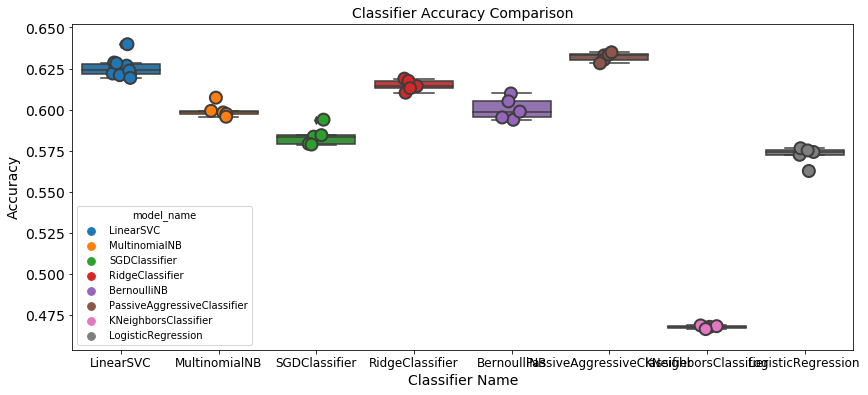

In [39]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
plt.figure(figsize=[14,6])
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, hue='model_name',
              size=12, jitter=True, edgecolor="gray", linewidth=2)
plt.title('Classifier Accuracy Comparison', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Classifier Name', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.show()

In [40]:
cv_df.groupby('model_name').accuracy.mean()

model_name
BernoulliNB                    0.600587
KNeighborsClassifier           0.467865
LinearSVC                      0.625602
LogisticRegression             0.572282
MultinomialNB                  0.599609
PassiveAggressiveClassifier    0.632010
RidgeClassifier                0.614831
SGDClassifier                  0.584031
Name: accuracy, dtype: float64

In [42]:
from sklearn.neural_network import MLPClassifier
X = data['comment']
y = data['sentiment']
# Create BOW in one step
cv=CountVectorizer(max_features=2500)
bow_trans_X = cv.fit_transform(X).toarray()
X_train,X_test,y_train,y_test=train_test_split(bow_trans_X,y,test_size=0.20)
# instantiating the model with Multinomial Naive Bayes
log_clf = LogisticRegression(random_state=0)
# training the model...
log_clf = log_clf.fit(X_train, y_train)
# Score the model fit for the train set
train_score = log_clf.score(X_train, y_train)
# Predict Outcomes using the MultinomialNB() model
predicted = log_clf.predict(X_test)
# Score the model fit
test_score = log_clf.score(X_test, y_test)
print("train score = ", train_score)
print("test score = ", test_score)

train score =  0.7802207584119637
test score =  0.6432894268422926


In [43]:
from io import StringIO
df = data
df = df[pd.notnull(df['sentiment'])]
#df.columns = ['sentiment', 'text']
df['sent_id'] = df['sentiment'].factorize()[0]
category_id_df = df[['sentiment', 'sent_id']].drop_duplicates().sort_values('sent_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['sent_id', 'sentiment']].values)

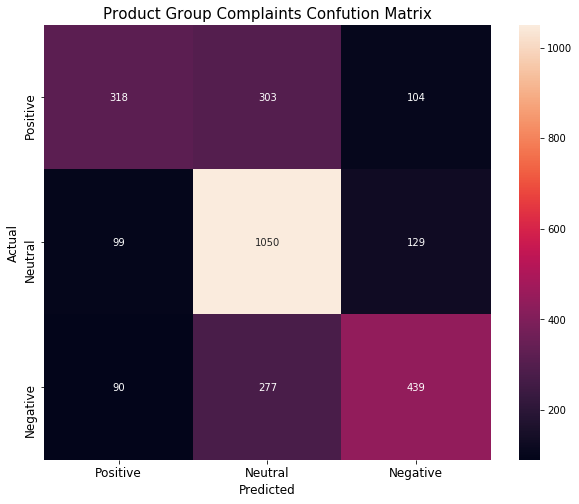

In [45]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
labels=['Positive','Neutral','Negative']
conf_mat = confusion_matrix(y_test, predicted)
fig, ax = plt.subplots(figsize=(10,8))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=ax.set_xticklabels(labels), yticklabels=ax.set_yticklabels(labels))
plt.title('Product Group Complaints Confution Matrix', fontsize = 15)
plt.ylabel('Actual', fontsize = 12)
plt.xlabel('Predicted', fontsize = 12)
plt.show()

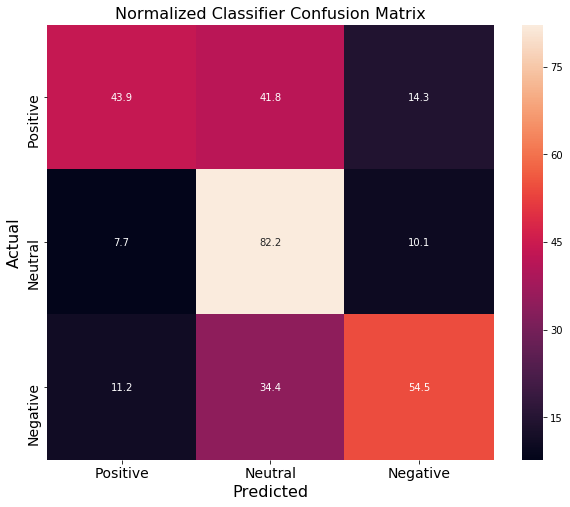

train score =  0.7802207584119637
test score =  0.6432894268422926


In [46]:
from sklearn.metrics import confusion_matrix
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
# Allow plots in Notebook
%matplotlib inline

conf_mat = confusion_matrix(y_test, predicted)
conf_sum = np.sum(conf_mat, axis=1, keepdims=True)
cm_perc = conf_mat / conf_sum.astype(float) * 100
fig, ax = plt.subplots(figsize=(10,8))

sns.heatmap(cm_perc, annot=True, fmt='.1f',
            xticklabels=ax.set_xticklabels(labels), yticklabels=ax.set_yticklabels(labels))
plt.title('Normalized Classifier Confusion Matrix', fontsize = 16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Actual', fontsize = 16)
plt.xlabel('Predicted', fontsize = 16)
plt.show()
train_score = log_clf.score(X_train, y_train)
test_score = log_clf.score(X_test, y_test)
print("train score = ", train_score)
print("test score = ", test_score)